# Plot the incidences
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.
The following code creates multiple plots out of the data to give a rough overview of the possibilities.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
plot_incidences_directory = os.getcwd()

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir("..")   # move one directory up
%run color_scheme.ipynb
os.chdir("collect_data")   # move to the cllect_data directory
%run get_data.ipynb
os.chdir(pop_densities_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
All data is ready!


## Plots


### Number of Seven Days Incidences
Plots all seven days incidences of all days availlable.<br/>
Is used to get a feeling of how many incidences are above certain thresholds and which ranges contain solid data and which are statistical noise.
<br/><br/>
In the first cell below, the user can set the range of plotted incidences and multiple horizontal lines which help the user to more easily read the data.

In [4]:
range_of_incidences = (350, 100000)    # the seven days incidence cannot get above 100,000
draw_horizontal_line_in_plot_at_position = [400, 500, 600]

In [5]:
incidences_in_range = list()
for countys_series_of_incidences in [county['incidences'] for county in covid19.values()]:
    for incidence in countys_series_of_incidences:
        if incidence > range_of_incidences[0] and incidence < range_of_incidences[1]:
            incidences_in_range.append(incidence)
incidences_in_range.sort()

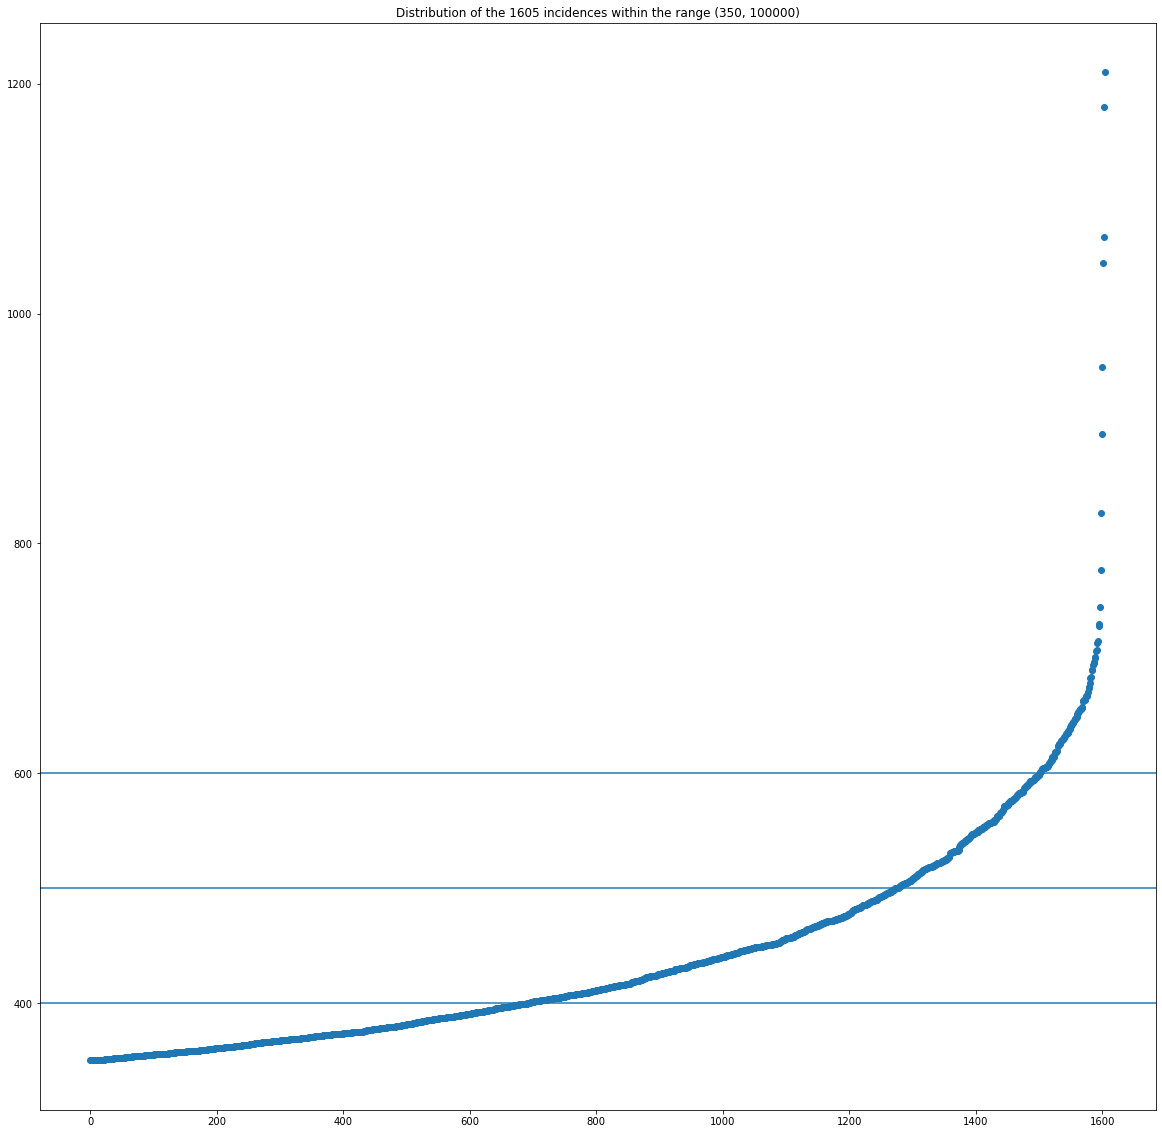

In [6]:
plt.figure(figsize=(20, 20))    # initiate and enlarge plot
for yvalue in draw_horizontal_line_in_plot_at_position:
    plt.axhline(yvalue)
plt.title("Distribution of the {} incidences within the range {}".format(
           len(incidences_in_range), range_of_incidences))
plt.scatter([e for e in range(len(incidences_in_range))], incidences_in_range)
plt.show()

### Incidences Sorted by Federal States
The series of the seven days incidence of every county are plotted into 16 plots: Sorted by the federal state the county is located in.
<br/><br/>
This process is also used to check that every county is related to one federal state:<br/>
The AdmUnitIDs of the counties (Gemeindeschlüssel) are copied to "covid19_copy".
The AdmUnitID of every county found with the state identifier is removed from the "covid19_copy". If any AdmUnitIDs remain in the end, an alert is triggered.

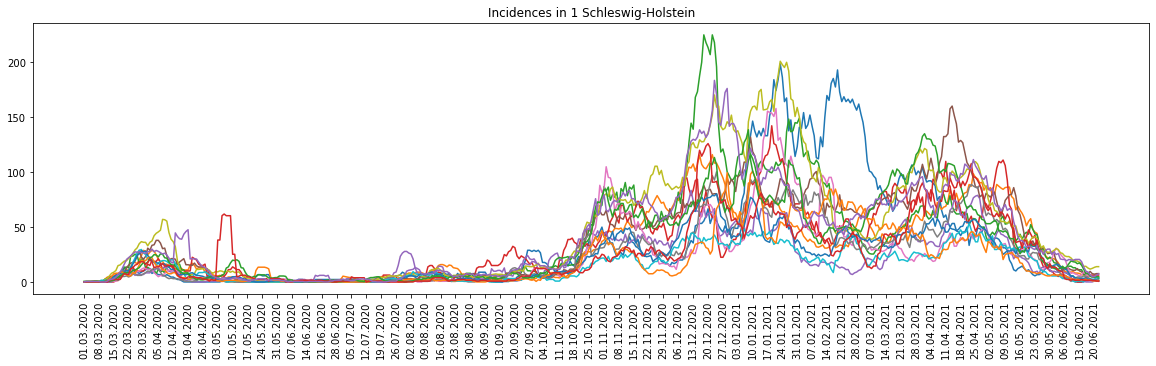

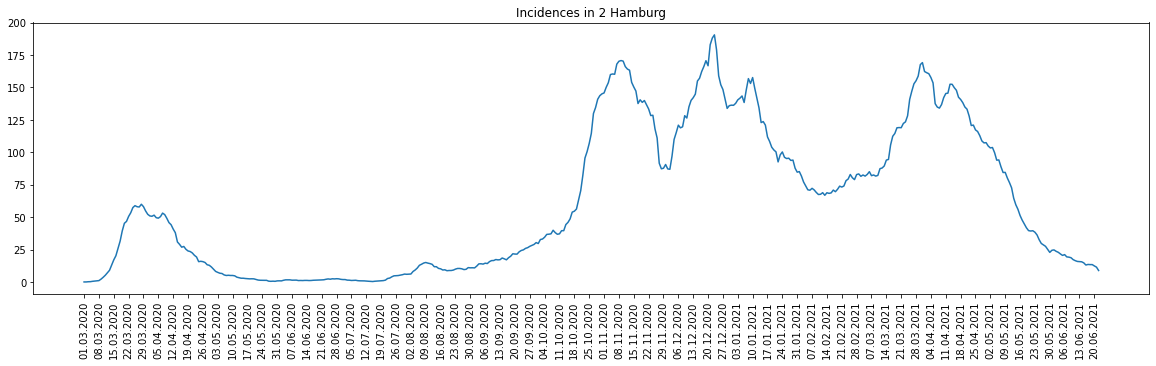

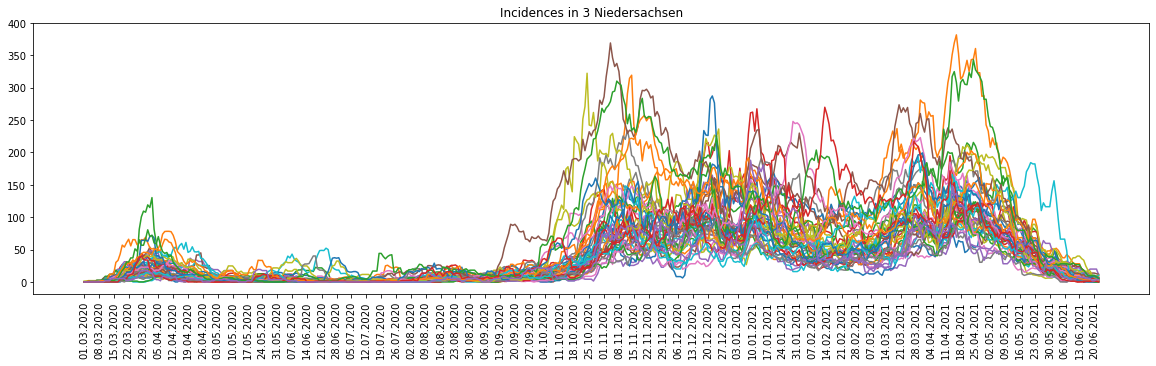

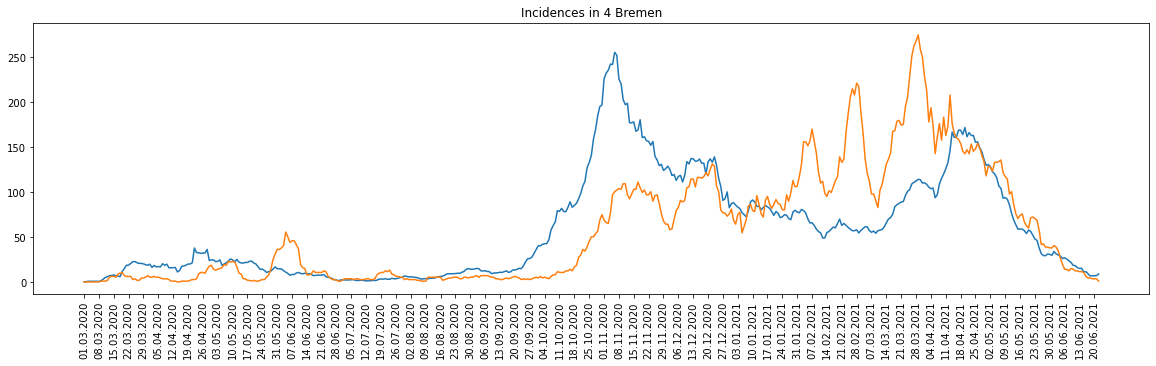

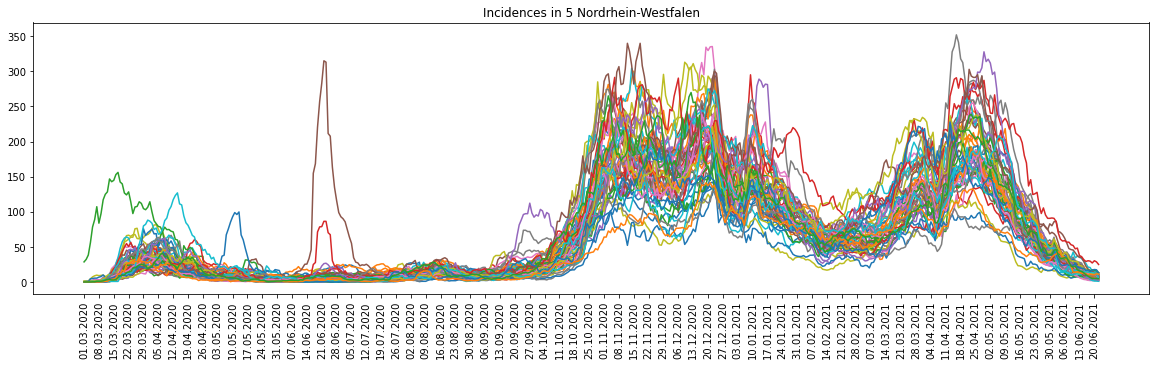

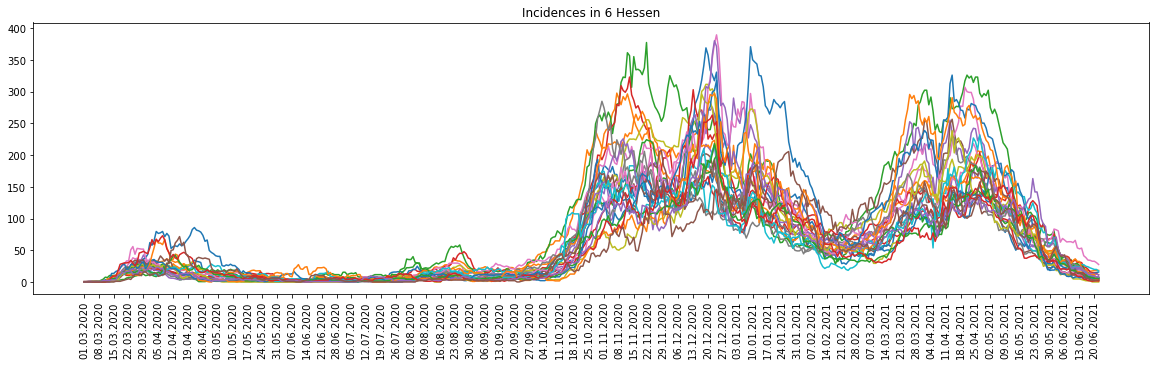

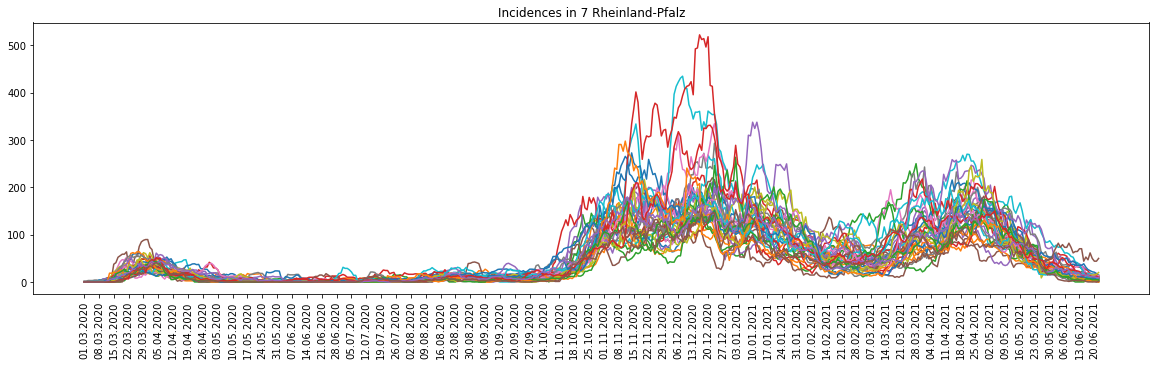

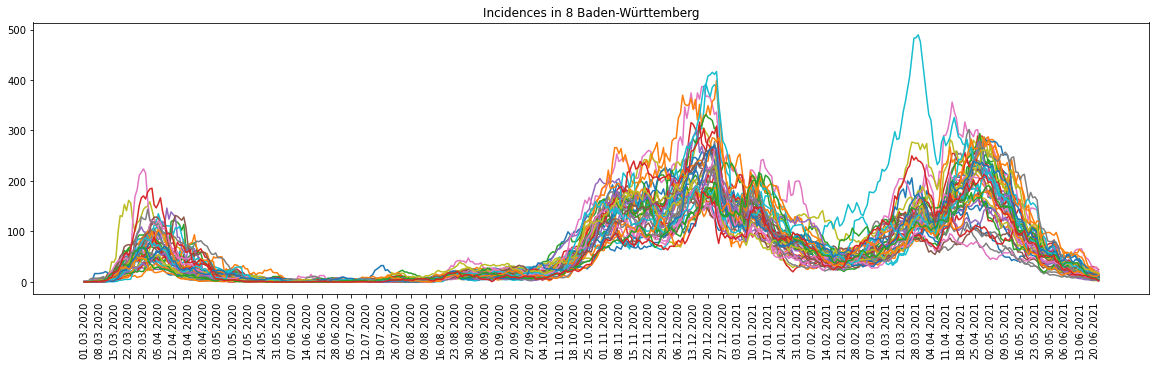

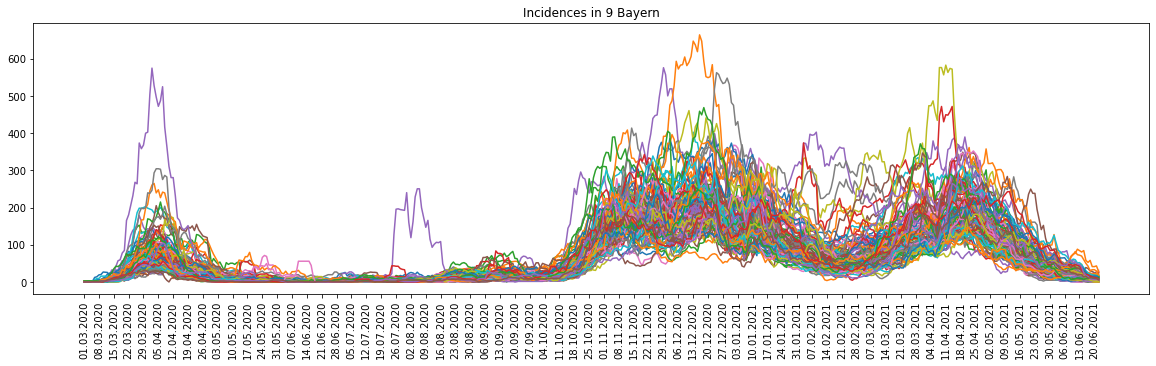

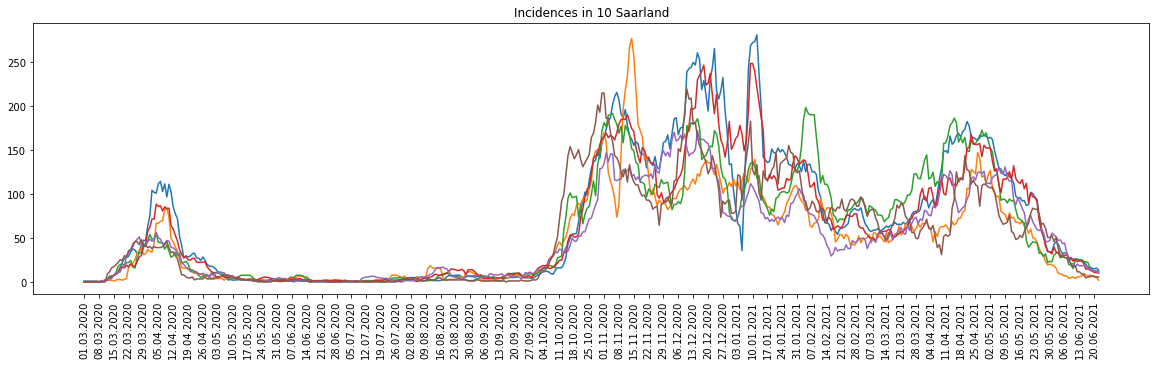

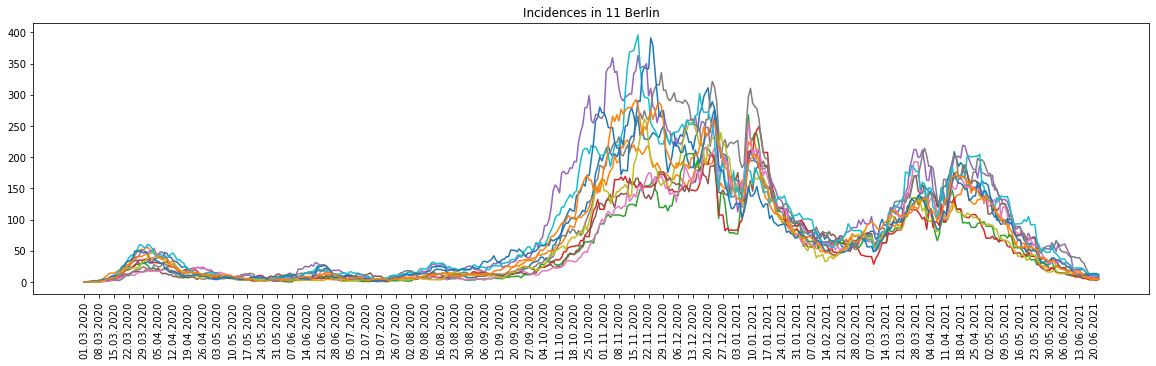

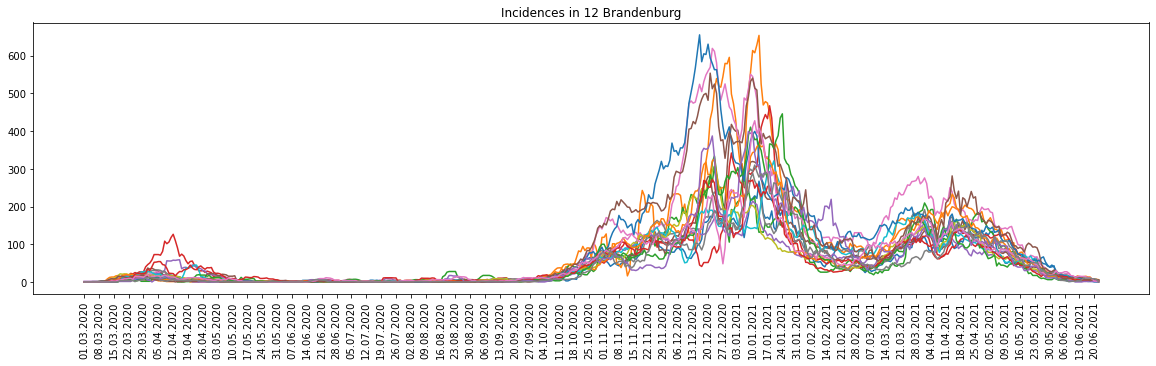

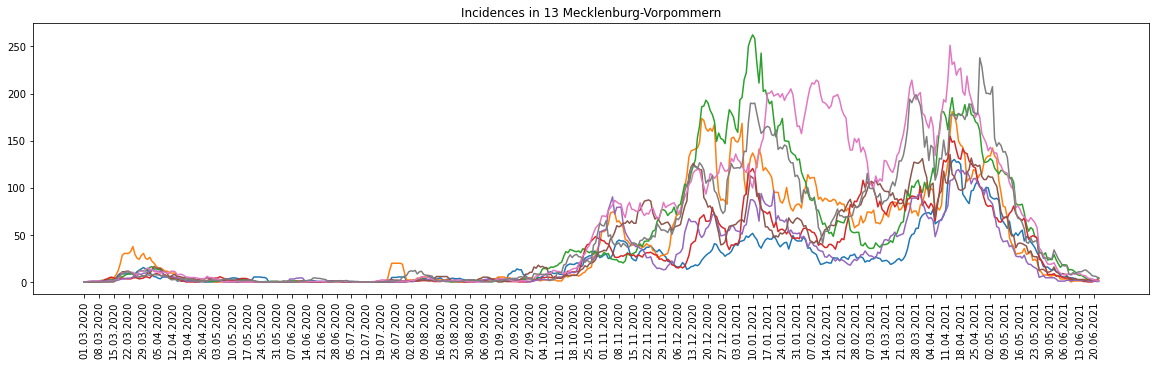

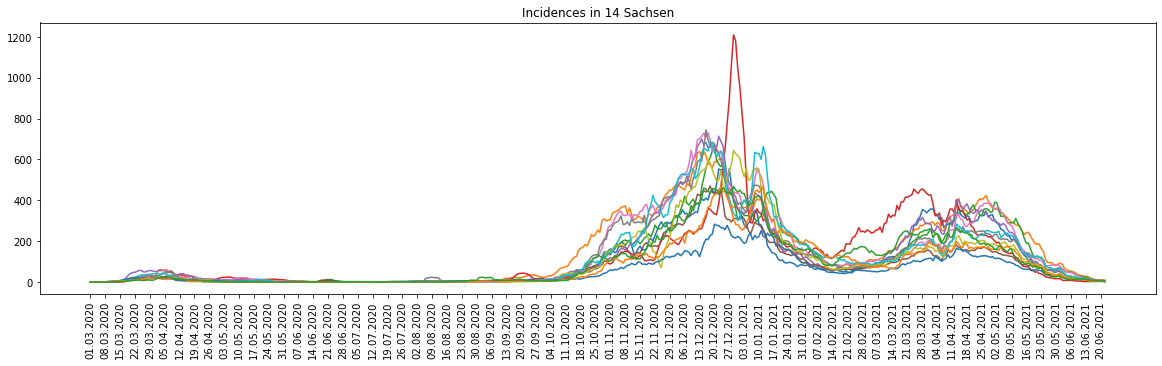

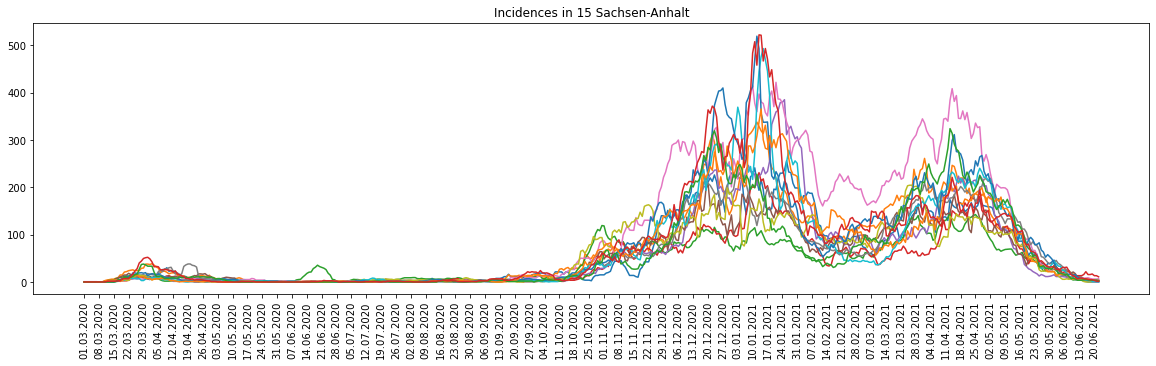

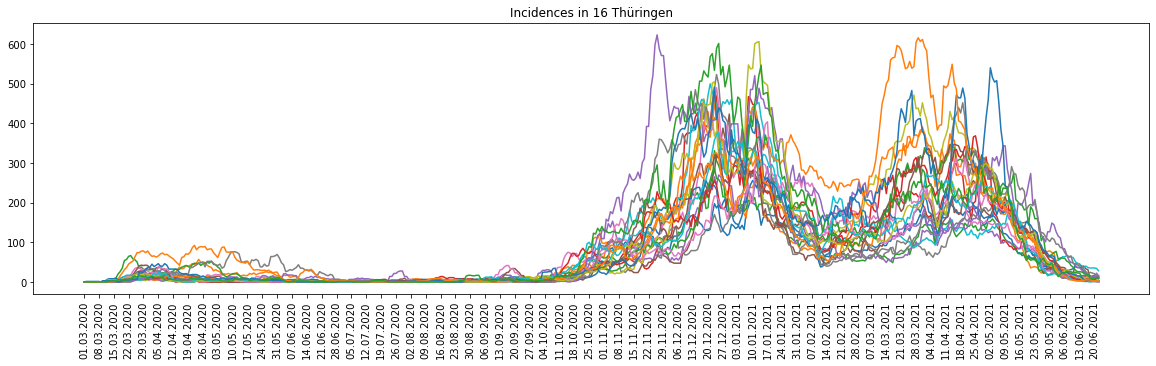

In [7]:
covid19_keys_copy = list(covid19.keys())
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # initiate and enlarge plot

    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data["unixtime"], county['incidences'])
            covid19_keys_copy.remove(AdmUnitID)

    plt.xticks(non_county_specific_data["unixtime"][::7],
               non_county_specific_data['UTC'][::7], rotation='vertical')
    plt.title("Incidences in {} {}".format(stateID, state))
    plt.show()

In [8]:
if len(covid19_keys_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_keys_copy:
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot Data of One State
The user can choose one federal state in the first cell below.
Afterwards the development of the seven days incidence of each county in the federal state is plotted.

In [9]:
state_ID = "13"
print("You have chosen {} {}.".format(state_ID, non_county_specific_data['states'][state_ID]))

You have chosen 13 Mecklenburg-Vorpommern.


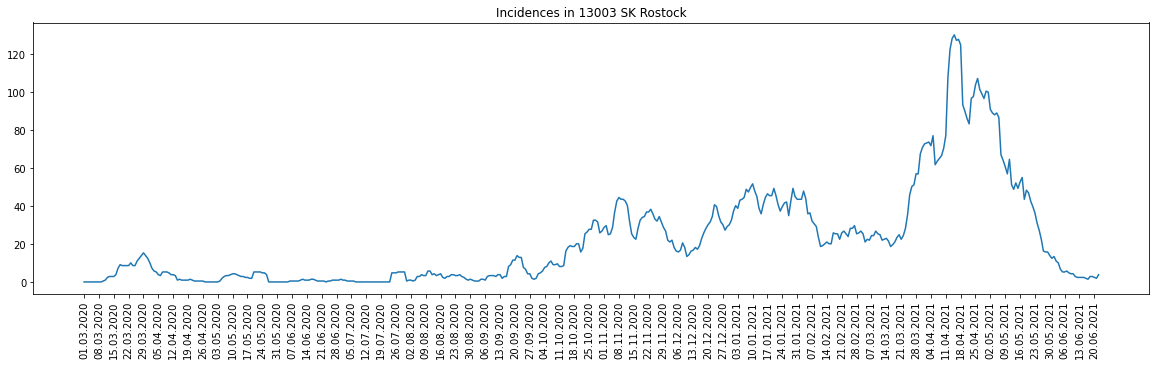

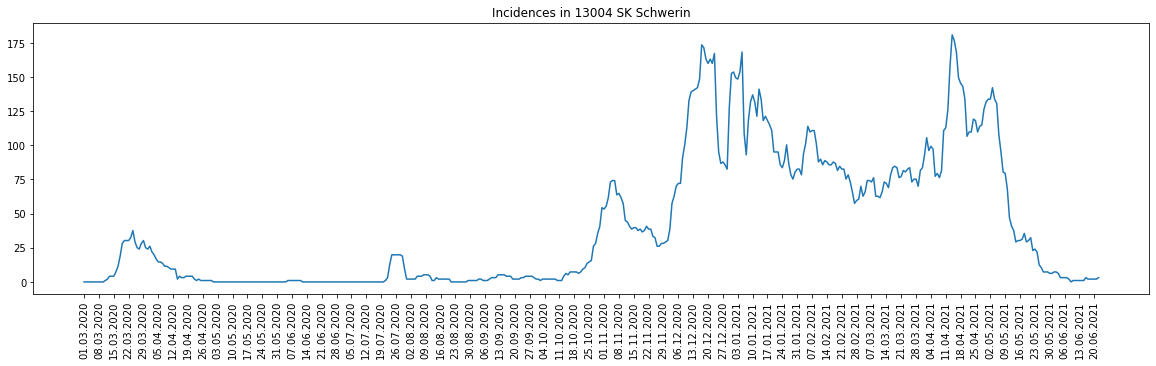

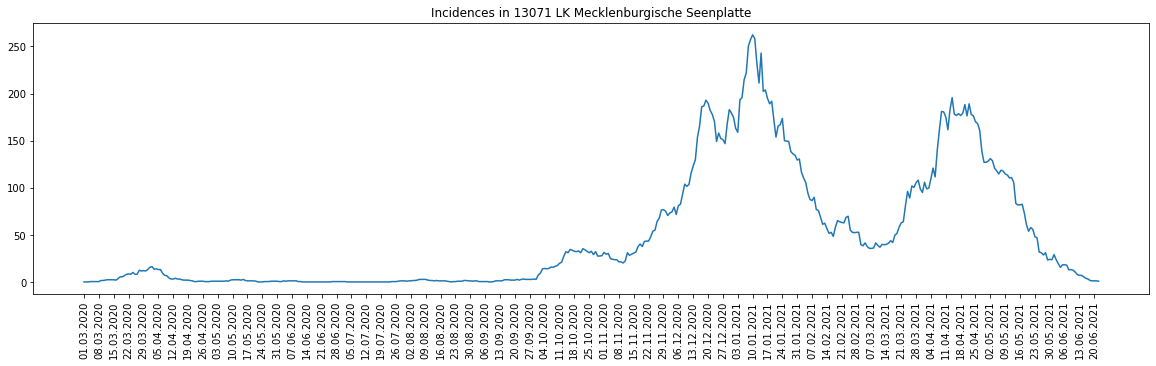

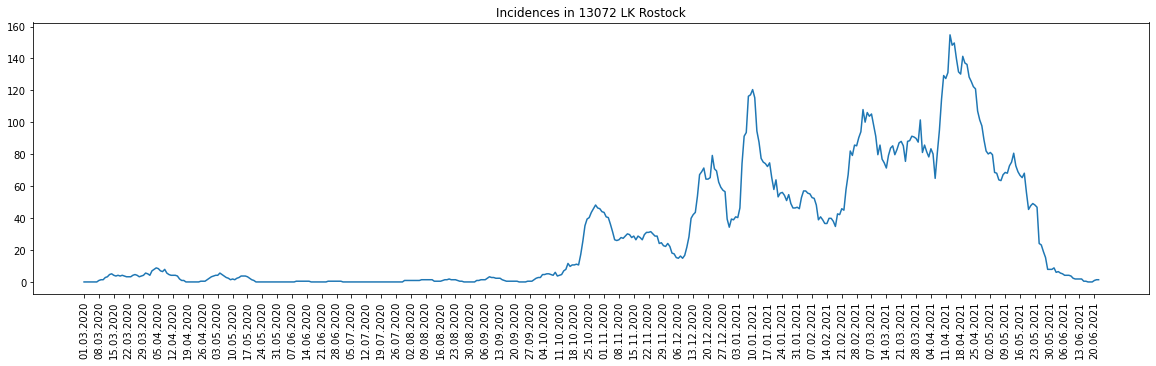

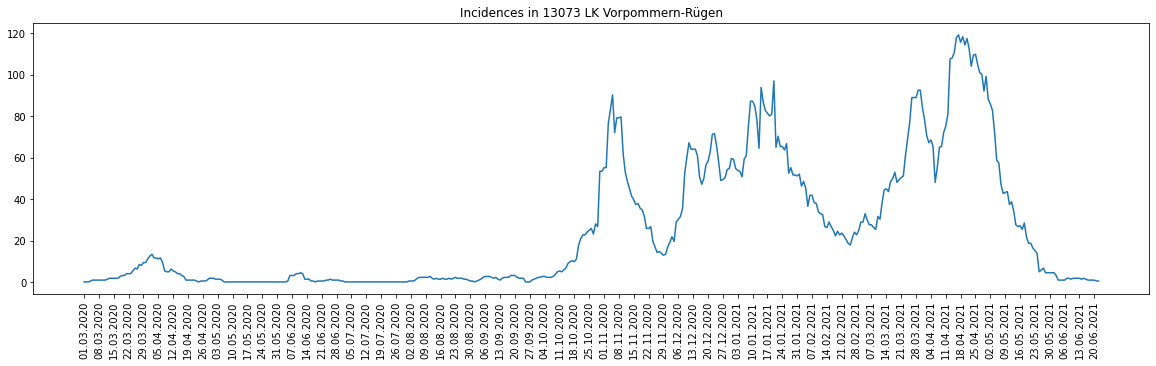

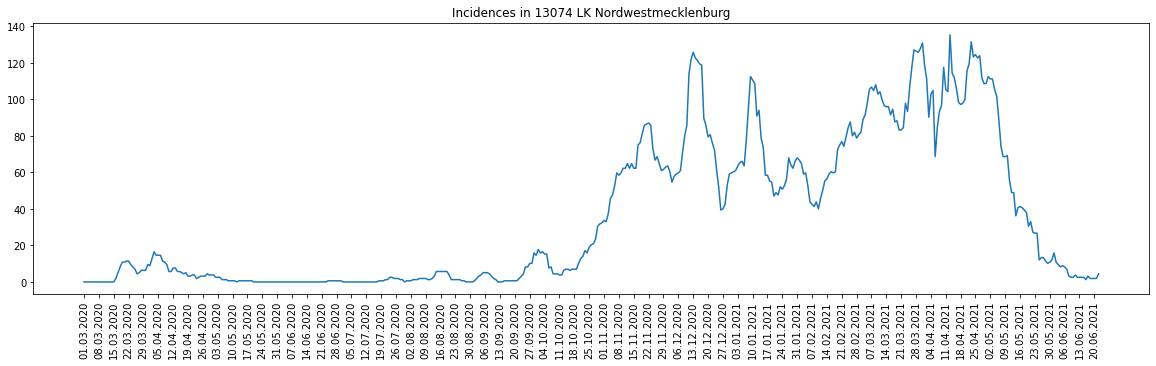

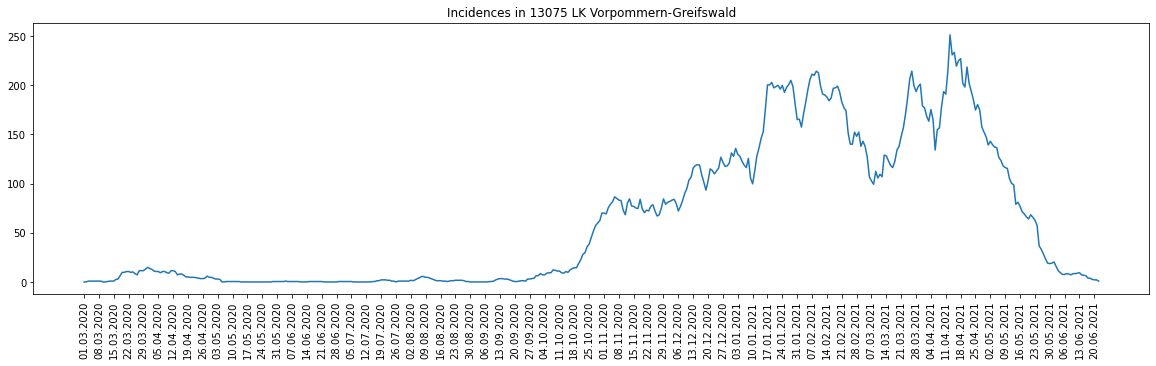

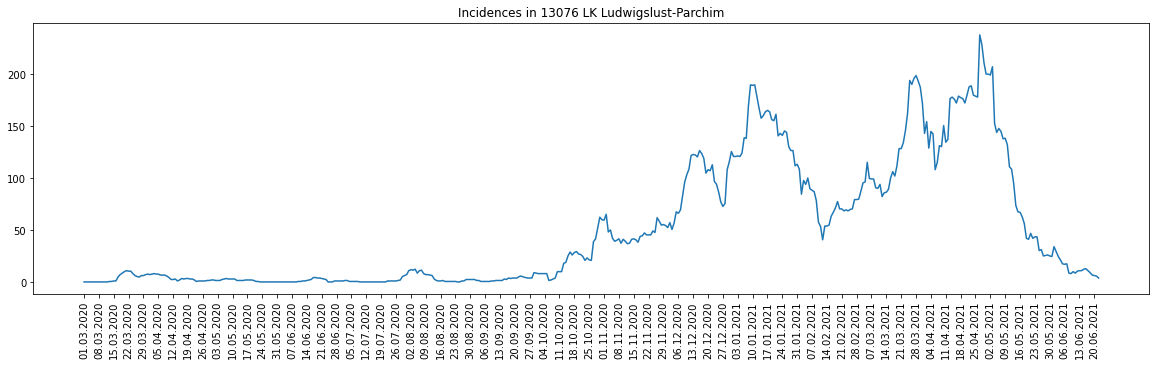

In [10]:
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == state_ID:
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.xticks(non_county_specific_data["unixtime"][::7],
                   non_county_specific_data['UTC'][::7], rotation='vertical')
        plt.plot(non_county_specific_data["unixtime"], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

## Plot the Incidence of Germany
The incidences of all counties are summed up and plotted over the time.

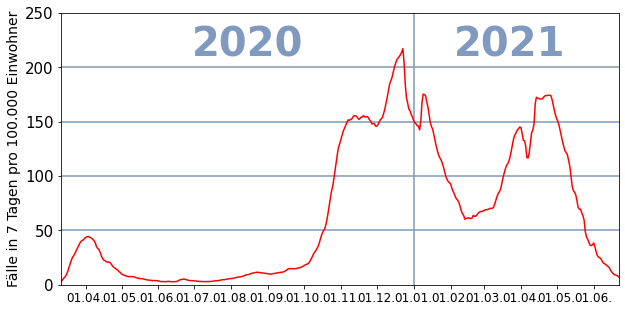

In [11]:
plt.figure(figsize=(10, 5))    # enlarge plot

# axis
plt.ylabel("Fälle in 7 Tagen pro 100.000 Einwohner", fontsize=14)
plt.yticks(fontsize=15)
plt.ylim(0, 250)

plt.xlim(non_county_specific_data["unixtime"][10],
        non_county_specific_data["unixtime"][-1])
first_days_of_months = list()
first_days_of_months_unix = list()
for date_index in range(len(non_county_specific_data['UTC'])):
    if non_county_specific_data['UTC'][date_index][:3] == "01.":
        first_days_of_months.append(non_county_specific_data['UTC'][date_index])
        first_days_of_months_unix.append(non_county_specific_data["unixtime"][date_index])
    if non_county_specific_data['UTC'][date_index] == "01.01.2021":
        new_year_date = non_county_specific_data["unixtime"][date_index]
plt.xticks(first_days_of_months_unix[1:],
           [e[:-4] for e in first_days_of_months[1:]], fontsize=12)

plt.hlines([50,100,150,200], non_county_specific_data["unixtime"][0],
        non_county_specific_data["unixtime"][-1], color=(0.5, 0.6, 0.7))
plt.vlines([new_year_date], 0, 250, color=(0.5, 0.6, 0.7))

plt.text(non_county_specific_data["unixtime"][120], 210, "2020",
         fontweight=1000, fontsize=40, color=(0.5, 0.6, 0.75))

plt.text(non_county_specific_data["unixtime"][340], 210, "2021",
         fontweight=1000, fontsize=40, color=(0.5, 0.6, 0.75))
plt.plot(non_county_specific_data["unixtime"], non_county_specific_data['incidences_germany'], color="r")
#plt.show()
plt.savefig("Inzidenz Deutschland.png")